In [101]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [77]:
df= pd.read_csv('ds1.csv',index_col = 0)

In [78]:
df.head()

x1        x2        x3        x5        x6         ya        yb  \
1  2.642583 -1.715220  1.909334  0.027139 -3.447187  13.630850  1.828765   
2  4.588761 -2.507543  4.239107  1.704150 -2.782809   7.834582  2.162110   
3  7.919796 -5.108415  3.039451  0.992815  5.551587  -5.107041  2.797083   
4  2.616757 -2.124040  2.855570  0.990079  1.694697  19.015046  1.953887   
5  3.300856 -5.159684  0.764544  0.143581  3.277496  -9.818862  1.922446   

         yc  
1  0.008386  
2  0.000008  
3 -0.000005  
4  0.038017  
5  0.001178

In [79]:
df.isna().sum()

x1    0
x2    0
x3    0
x5    0
x6    0
ya    0
yb    0
yc    0
dtype: int64

ALl columns are numeric. Therefore use describe to access the table. There is no missing value

In [80]:
df.describe()

x1             x2             x3             x5  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        5.011059      -3.005565       2.500593       0.999136   
std         2.873568       2.000799       1.752906       1.002006   
min         0.000015     -12.498524      -3.489212       0.000003   
25%         2.536309      -4.353844       1.189920       0.285629   
50%         5.022191      -3.002649       2.503764       0.690903   
75%         7.486275      -1.649283       3.802236       1.386862   
max         9.999887       6.089820       8.679097      15.102966   

                  x6             ya             yb            yc  
count  100000.000000  100000.000000  100000.000000  1.000000e+05  
mean        0.000647       3.827867       2.111854  1.022765e-04  
std         4.663860      18.438514       0.769306  3.121215e-02  
min       -13.885453     -64.021995      -0.523672 -5.433613e-01  
25%        -2.611943      -8.998020       1.580212 -2.423158e-03  
50%        -0.000611       2.666992       2.231057 -5.670000e-10  
75%         2.621841      15.579687       2.733318  2.476745e-03  
max        13.924740     107.713997       3.841363  8.183882e-01

There is no missing value, all columns are numeric.Most of them range from negative value to positive. Except for x5, which is positive only.

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>],
       [<AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'ya'}>],
       [<AxesSubplot:title={'center':'yb'}>,
        <AxesSubplot:title={'center':'yc'}>, <AxesSubplot:>]],
      dtype=object)

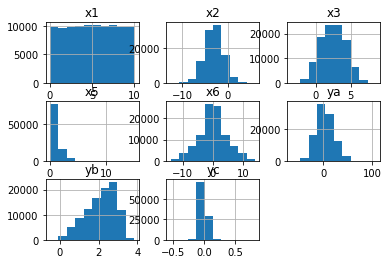

In [81]:
df.hist()

<AxesSubplot:>

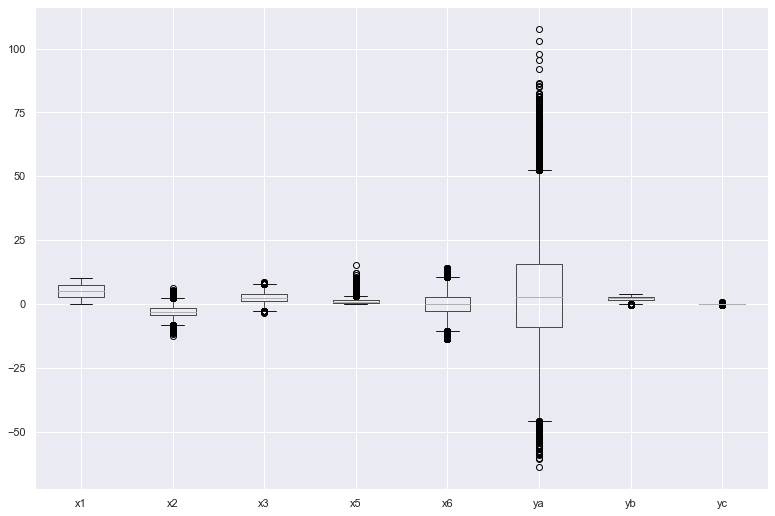

In [134]:
df.boxplot()

Xs 

x1 seems to have a Continuous uniform distribution(entirely from 0 to 10). No outliers

x2 is relatively normal distributed(), outliers at both upper and lower bound

x3 also pretty normal distributed(), some outliers at both upper and lower bound

x5 is heavily skewed to the right- (), outliers at upper bound

x6 is pretyy normal distrbuted with mode around 0(raning around -10 to 10),outliers at both upper and lower bound

Ys

ya: relatively normal distributed, slightly left skew, many outliers in both o upper and lower bound

yb: left skew, mode is around 3, few outliers at lower bound.

yc: ranging from -.5 to .5. outliers at both upper and lower bound


In [74]:
z = np.abs(stats.zscore(df))
print(z)
len(z)

[[0.82423268 0.64491812 0.33730365 ... 0.53166066 0.36798093 0.26538936]
 [0.14696031 0.24891259 0.99179455 ... 0.21730253 0.06532678 0.0030218 ]
 [1.01224396 1.05101099 0.30740984 ... 0.48458093 0.8907152  0.00343799]
 ...
 [0.51489583 0.56947128 0.37078494 ... 0.1952567  0.38078679 0.09672848]
 [0.75043887 0.51178146 0.92344327 ... 0.93872493 0.81083518 0.00310959]
 [1.6521119  0.17560315 0.62932781 ... 0.57247903 1.1500615  0.069308  ]]


100000

In [75]:
len(z[z>3])


4838

The boxplot there shows considerable amount of outliers within the dataset. However, from the calculation, it shows that the outliers takes up a large portion of the data. Therefore, I decide to not drop them.

Given the dependent variables and target variables. We should be using supervised learning. The linear regression provides an objective function as asked in the question y = f(x_1 , … , x_n). Therefore I will be using LM for to find the equation for each y sequence

I will be using mse,mae and rmse as my metrics

# Linear regression for "ya"

I will be using mse,mae and rmse as my metrics. The p-value threshold I decide to set for each variable significance level is .05 to meet the standard 95% confidence interval.

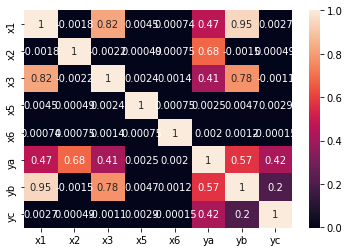

In [20]:
df_small = df.iloc[:,:]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

Correlation often suggest importance of the variable against the target variable.

From the correlation matrix, x1,x2 and x3 seem to show some correlation against 'ya'. While x5 and x6 seems to be irellavent.

The heatmap of correlation martix shows the correlation between x variables agaisnt y sequences. It will be used in other y sequences as well to access correlation

In [23]:
X = df[['x1','x2','x3','x5','x6']]

In [24]:
y = df['ya']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [27]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
# print the coefficients
coef = model.coef_
coef

array([ 2.50985054e+00,  6.22126445e+00,  9.70512515e-01, -2.62642837e-02,
        4.32017158e-03])

In [28]:
y_pred = model.predict(X_test)


In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.41571847184753
Mean Squared Error: 110.8555204682102
Root Mean Squared Error: 10.528794825059999


In [30]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 4.190e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:46:27   Log-Likelihood:            -3.7685e+05
No. Observations:              100000   AIC:                         7.537e+05
Df Residuals:                   99994   BIC:                         7.538e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5697      0.089     84.712      0.0

As expected, Variables x5 and x6 seems to show no significance as we expected with their p-value way greater than the significance level(0.05) and very low coefficient when predicting the target variable "ya"
Therefore, I will drop these two variables and rerun the model

### Revised variables for ya

In [31]:
X = df[['x1','x2','x3']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
# print the coefficients
coef = model.coef_
coef

array([2.50978138, 6.22124205, 0.97055671])

In [33]:
y_pred = model.predict(X_test)


In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.415535492211585
Mean Squared Error: 110.84888702250542
Root Mean Squared Error: 10.52847980586492


In [35]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ya   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 6.983e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:46:44   Log-Likelihood:            -3.7685e+05
No. Observations:              100000   AIC:                         7.537e+05
Df Residuals:                   99996   BIC:                         7.537e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5720      0.083     91.102      0.0

By dropping the variable x5 and x6, the metrics such as MSE,MSE and RMSE all seemed to decrease(improve). While the magnitude is not huge, it does indicate that x5 and x6 are not suitable variable for predicting variable "ya"

Final equation:

ya= 2.5177x1 + 6.2346x2 +0.9511x3 +7.5720

##### A similar approach will be applied for variable 'yb' and 'yc'. I will first examine a linear regression model with all the variables and drop the insignificant ones to re-run the model

# Linear regression for "yb"

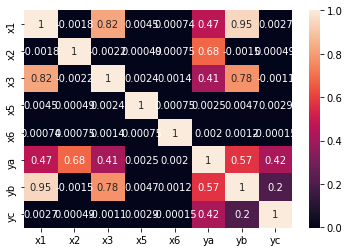

In [36]:
sns.heatmap(correlation_mat, annot = True)

plt.show()

From the heatmap again, x1 shows very strong positive correlation against yb. x3  also has a moderate to high positive relationship against yb, while other 3 x variables show almost no correlation

In [37]:
X = df[['x1','x2','x3','x5','x6']]
y = df['yb']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
# print the coefficients
coef = model.coef_
coef

array([ 2.53822848e-01,  9.30121291e-05, -1.24557281e-03, -6.16912451e-04,
        5.34418811e-05])

In [40]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.702e+05
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:51:09   Log-Likelihood:                -3038.6
No. Observations:              100000   AIC:                             6089.
Df Residuals:                   99994   BIC:                             6146.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8427      0.002    396.244      0.0

In [41]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19590300502390545
Mean Squared Error: 0.06201332722762161
Root Mean Squared Error: 0.24902475223885198


#### Revised variables for yb

In [42]:
X = df[['x1','x3']]
y = df['yb']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [147]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
# print the coefficients
coef = model.coef_
coef

array([ 0.25382145, -0.00124573])

In [148]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1958955090672028
Mean Squared Error: 0.06200839258339022
Root Mean Squared Error: 0.24901484410249566


In [149]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yb   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 4.256e+05
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:33:00   Log-Likelihood:                -3038.8
No. Observations:              100000   AIC:                             6084.
Df Residuals:                   99997   BIC:                             6112.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8428      0.002    531.483      0.0

Similarly, by dropping the insignificant variables, the model improved in metrics(RMSE,MAE,MSE)

Final equation:

yb= 0.2542x1 -0.0018x3 + 0.8428

note:(
x3 is negatively correlated with yb)

# Linear Regression for variable "yc"

In [127]:
X = df[['x1','x2','x3','x5','x6']]
y = df['yc']

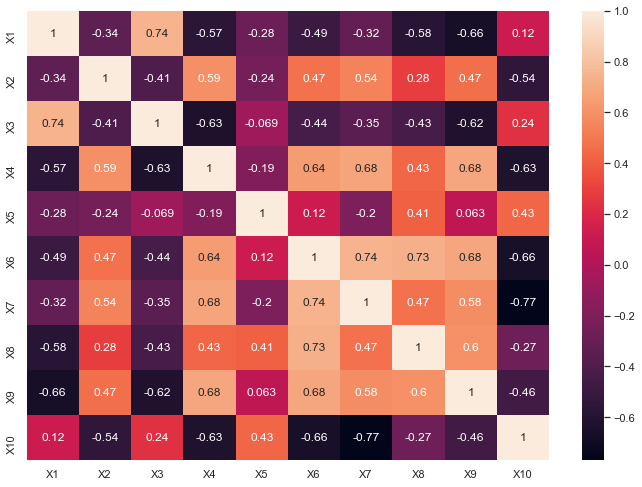

In [97]:
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9993
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.416
Time:                        22:39:57   Log-Likelihood:             2.0480e+05
No. Observations:              100000   AIC:                        -4.096e+05
Df Residuals:                   99994   BIC:                        -4.095e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.427      0.6

Most variables fail the significance test, only x1 barely past

In [114]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013056611821973747
Mean Squared Error: 0.001005124233281849
Root Mean Squared Error: 0.03170369431599177


### Revised for yc

In [106]:
X = df['x1']
y = df['yc']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7539
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.385
Time:                        22:40:30   Log-Likelihood:             2.0480e+05
No. Observations:              100000   AIC:                        -4.096e+05
Df Residuals:                   99998   BIC:                        -4.096e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.717e-05      0.000     -0.238      0.8

In [123]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013046883245375179
Mean Squared Error: 0.0010051683408469883
Root Mean Squared Error: 0.03170438993021295


Final equation:

yc= 2.982e-05x1 -4.717e-05

Final thoughts on exercise one:
    For ya and yb, the models contain some strong variables. After dropping the insignificant variables, the metrics shown a little improvement. While the magnitude is not strong, it does suggest dropping the insignificant variables is the correct decision- reducing noise.
    
    For yc, only x1 has the P-value that meets the significance threshold of .05. By keeping x1 as the only variable, the metrics(rmse,MSE,MAE) did increase to some extent.
    
    Overall, there is no way to acess the excact performance of the model as the metrics(rmse,mse etc) are meaningless without a baseline comparison
    
    However, from the correlation matrix and R squared value, we can infer the model for 'yb' is the strongest as the input variables have a strong positive correlated wih the target variables(.95 and .78), with the R square value of .895. 
    
    'ya' model comes second as its correlation with the input variables are moderate positively correlated(.4 to .68), R squared of .677.
    
    'yc' model comes last as the only input variable showed almost no correlation with the target variable and R squared value is close to 0.
    
    However, one thing to note is that from the boxplot, we found that many variables (both target and independent variables) are subject to significant amount of outliers. These outliers may drive poor performance of the models and the results.

# Exercise two

In [128]:
df1 = pd.read_csv('ds2.csv',index_col = 0)

In [111]:
df1.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  
1  -6.110282 -28.959316   2.851336  
2   7.070349  -5.762185 -23.050198  
3  19.119391 -15.582122 -12.292535  
4   0.493711 -15.305347   6.799087  
5 -10.848273 -17.285491   6.034214

In [112]:
df1.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
dtype: int64

No missing values

<AxesSubplot:>

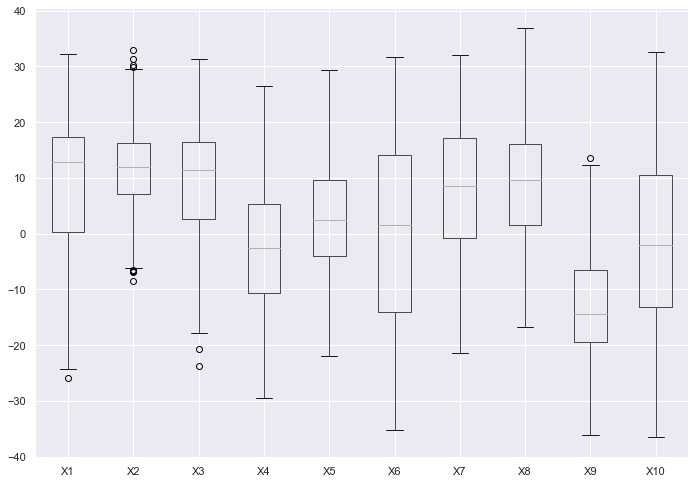

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1.boxplot()

Not many outliers found

In [89]:
df1.describe()

X1           X2           X3           X4           X5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      8.677829    11.716801     9.252817    -2.679634     2.774942   
std      11.971827     6.655333     9.861443    10.625164     8.800553   
min     -25.824199    -8.497562   -23.666439   -29.429655   -22.033329   
25%       0.231327     7.161564     2.648845   -10.652694    -4.098043   
50%      12.754335    11.896021    11.422441    -2.631318     2.484416   
75%      17.364337    16.279210    16.503676     5.340314     9.660898   
max      32.268570    32.909917    31.230550    26.422798    29.312010   

                X6           X7           X8           X9          X10  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.077631     8.200884     8.712878   -12.860135    -1.339360  
std      15.375478    10.426023     9.881482     8.881026    14.534143  
min     -35.264019   -21.428538   -16.811146   -36.065150   -36.468083  
25%     -14.003670    -0.812888     1.480706   -19.430697   -13.216190  
50%       1.500838     8.532535     9.628064   -14.417786    -2.094310  
75%      14.050512    17.138898    16.081044    -6.534142    10.561797  
max      31.727042    32.084297    36.847922    13.553705    32.641789

All variables are numeric. Therefore, describe does a job summarizing them. There seems to be no target variable. Therefore unsupervised learning would be approporiate here.

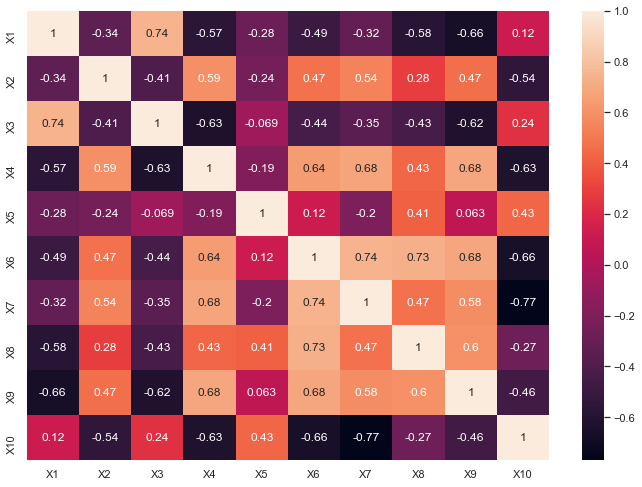

In [90]:
df1_sub = df1.iloc[:,:]

correlation_mat = df1_sub.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

To visualize, I utilized heatmap to show correlation, and then plotted scatterplot for every variable against one another

In [91]:
import plotly.express as px

fig = px.scatter_matrix(df1.iloc[:,:])
fig.show()

#### Grouping the variables using K-mean clustering

It seems like there is no target variable for ds2. Therefore, unsupervised learning with clustering analysis seems to be approporiate approach

In [114]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(df1)
     sse.append(kmeans.inertia_)

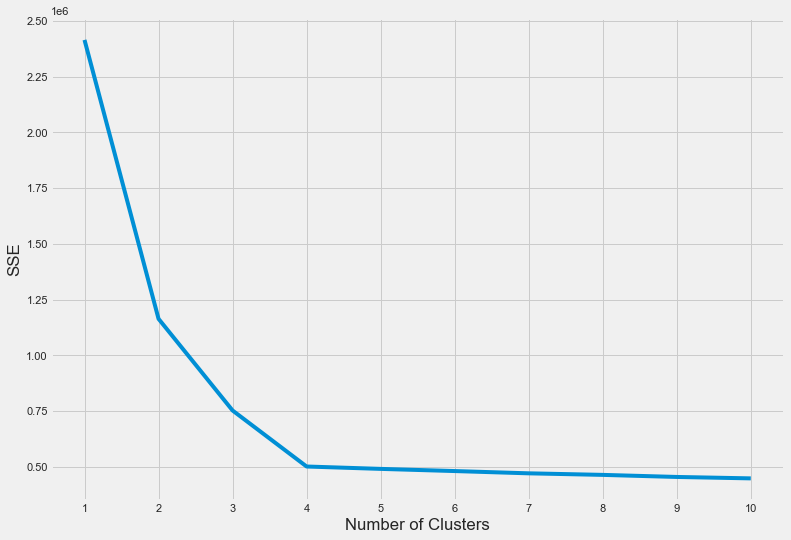

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


Optimal cluster at 3 cluster at SSE stops its sharp decrease

In [116]:
X = df1.iloc[:,:]
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels

array([0, 2, 2, ..., 0, 1, 0], dtype=int32)

In [117]:
pd.DataFrame(labels).value_counts(sort=False)

0    1001
1     510
2     489
dtype: int64

Three clusters are created

In [118]:
X_df = pd.DataFrame(X)
X_df.columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
X_df['label'] = pd.DataFrame(labels)
X_df.head()

X1         X2         X3         X4        X5         X6         X7  \
1  23.778224  13.319974  15.565124  -3.713626  7.296793 -19.371013  -0.894130   
2  16.602950  23.311281  21.099052  -0.304154 -3.218990   2.357643  12.027277   
3  12.084683  19.710443   9.837102  -1.081918 -1.201942   9.738019  16.125920   
4  13.044534  10.749040   5.884407 -11.703525 -4.134358 -22.344666  -1.263349   
5   8.314115   6.748794   5.388535  -0.000290 -4.724787 -16.346812   3.293600   

          X8         X9        X10  label  
1  -6.110282 -28.959316   2.851336    2.0  
2   7.070349  -5.762185 -23.050198    2.0  
3  19.119391 -15.582122 -12.292535    0.0  
4   0.493711 -15.305347   6.799087    0.0  
5 -10.848273 -17.285491   6.034214    0.0

In [119]:
X_stat = X_df.groupby('label').agg('mean')
X_stat

X1         X2        X3        X4        X5        X6        X7  \
label                                                                          
0.0    8.953784  11.498606  9.608164 -3.087615  2.717985 -0.587041  7.959257   
1.0    8.264476  12.198668  9.005728 -1.942345  2.924222  1.171365  9.143565   
2.0    8.529566  11.655147  8.777765 -2.600642  2.747174  0.328497  7.715576   

             X8         X9       X10  
label                                 
0.0    8.553587 -13.146663 -1.344581  
1.0    9.223039 -12.517970 -1.562734  
2.0    8.538038 -12.628419 -1.093900

The mean of each cluster does not seem to vary significantly, except for X6. This may be a problem as the clusters do not differentiate from one another

#### Sample plotting
choosing few variables to plot against each other to see the impact clustering  

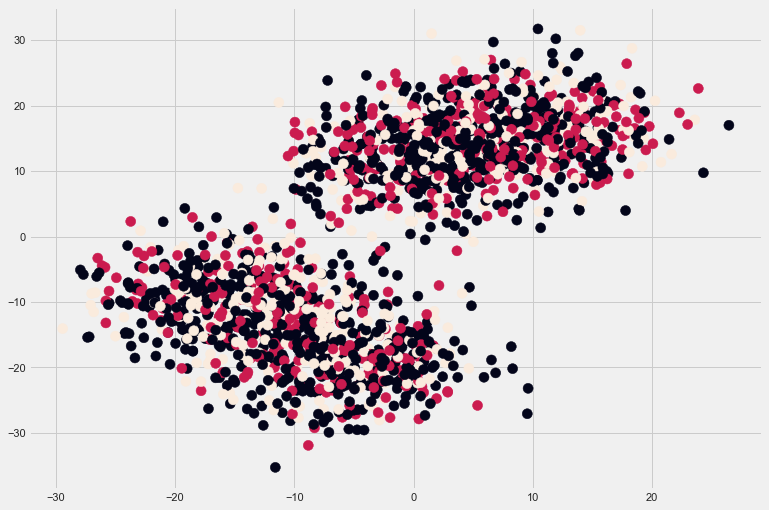

In [120]:
plt.scatter(X_df['X4'],X_df['X6'], s=100, c= X_df['label'])


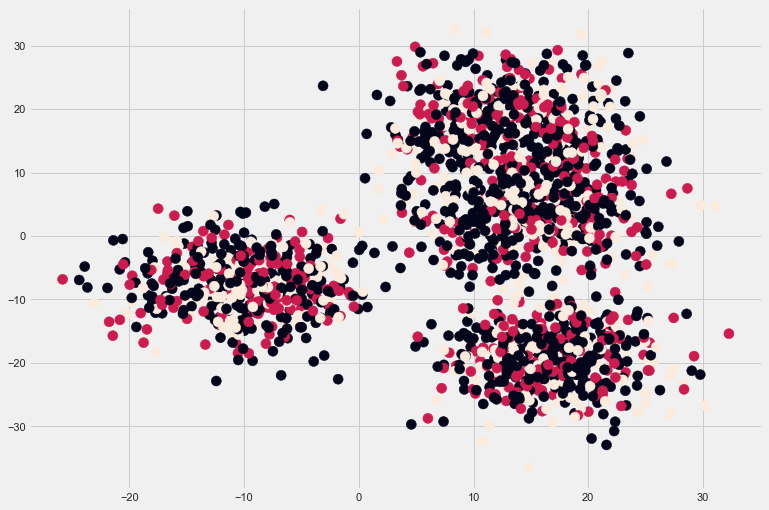

In [121]:
plt.scatter(X_df['X1'],X_df['X10'], s=100, c= X_df['label'])

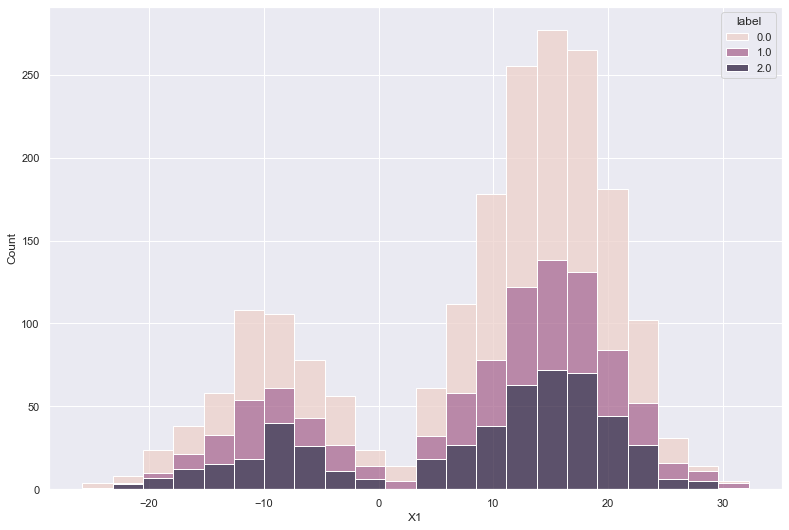

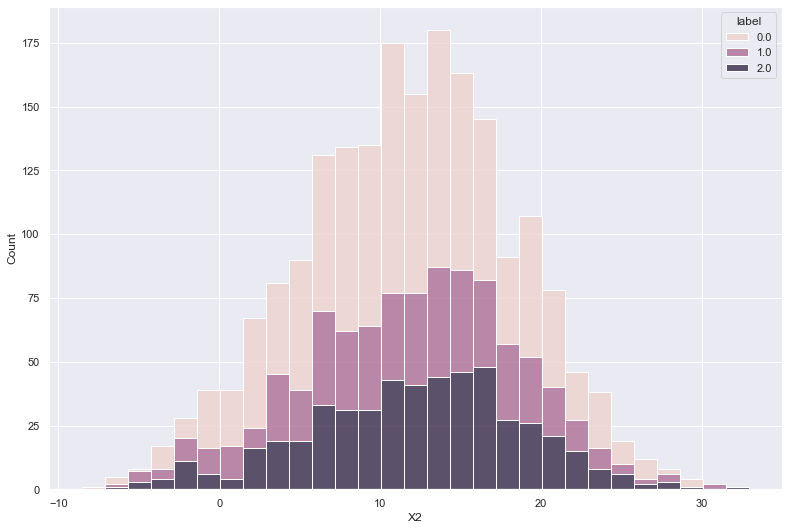

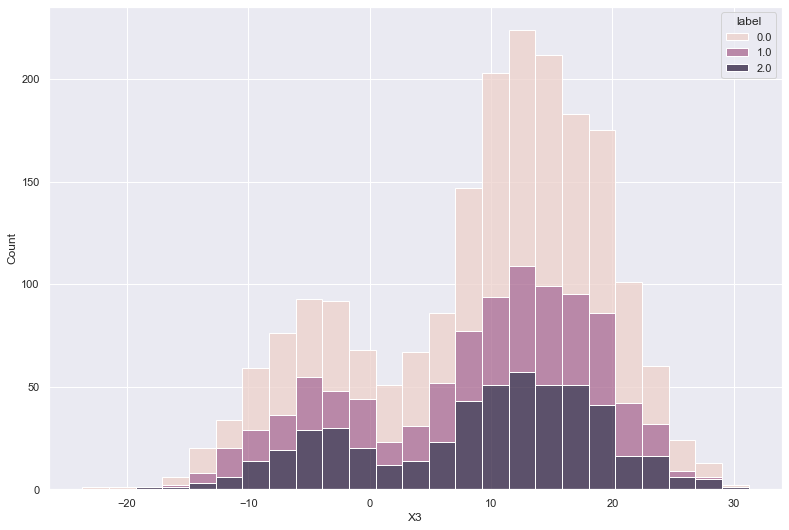

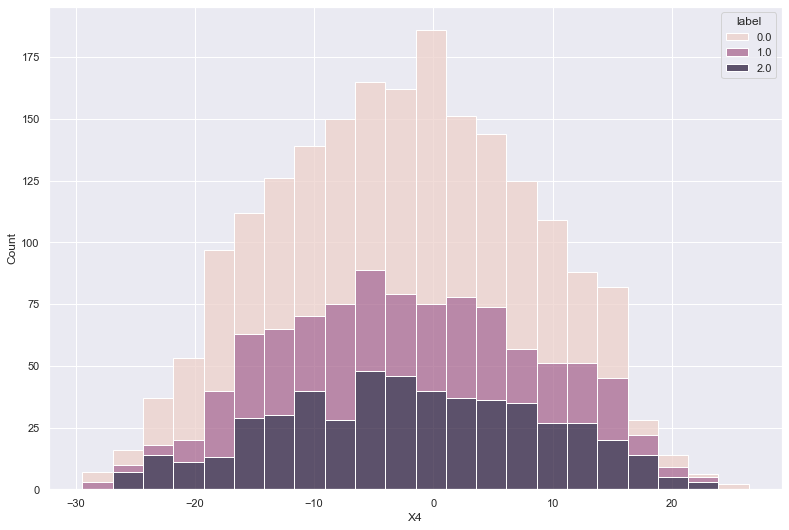

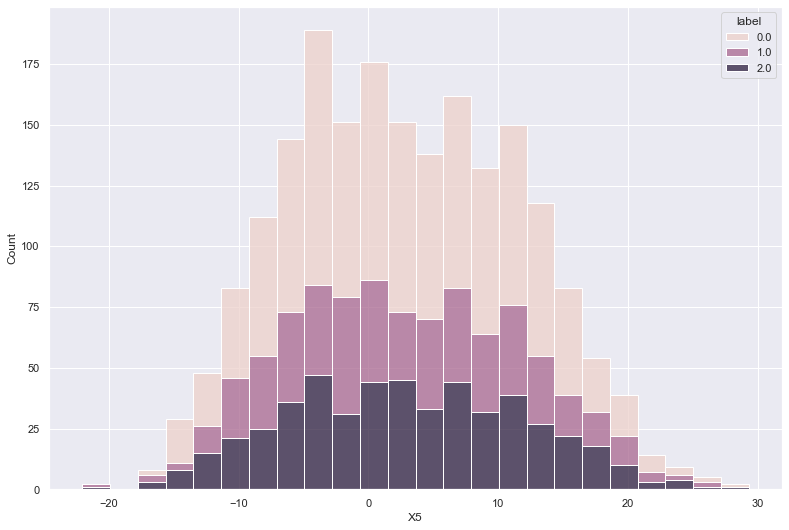

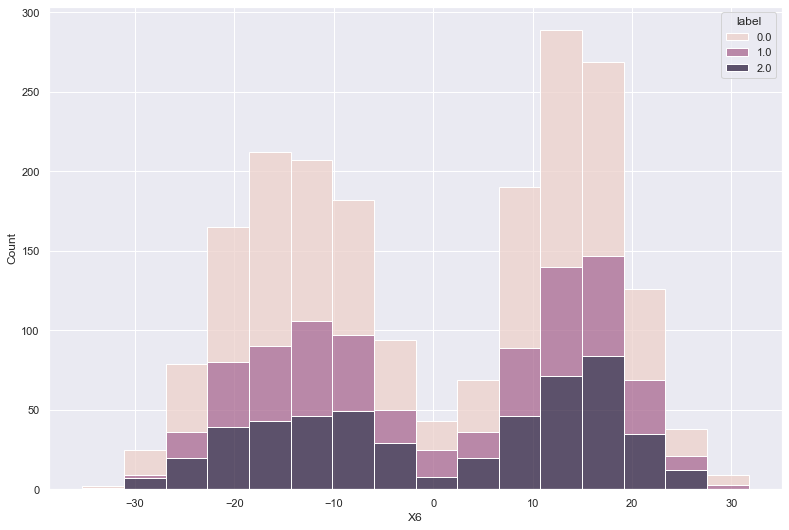

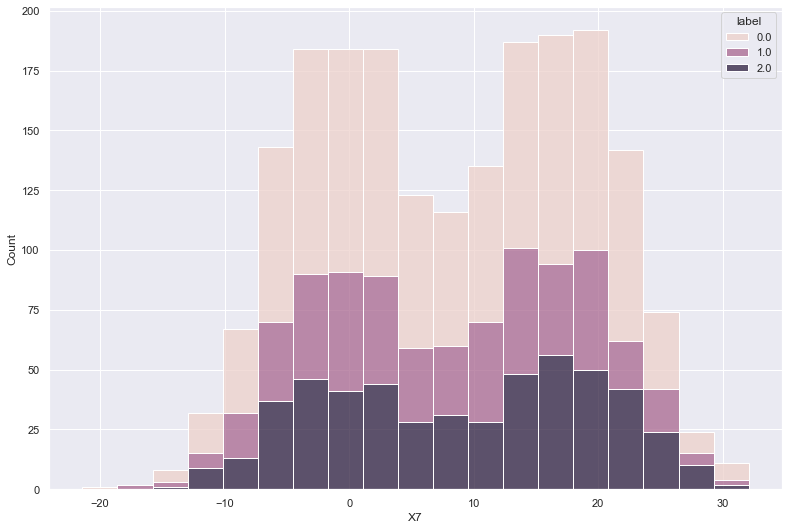

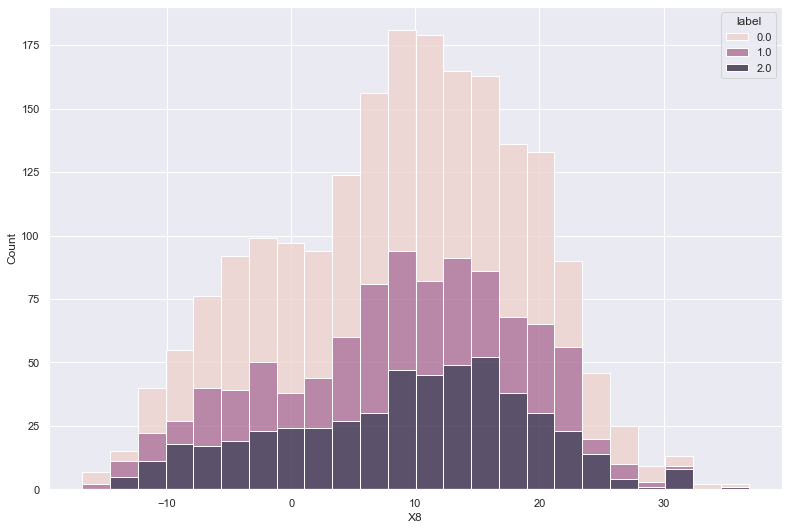

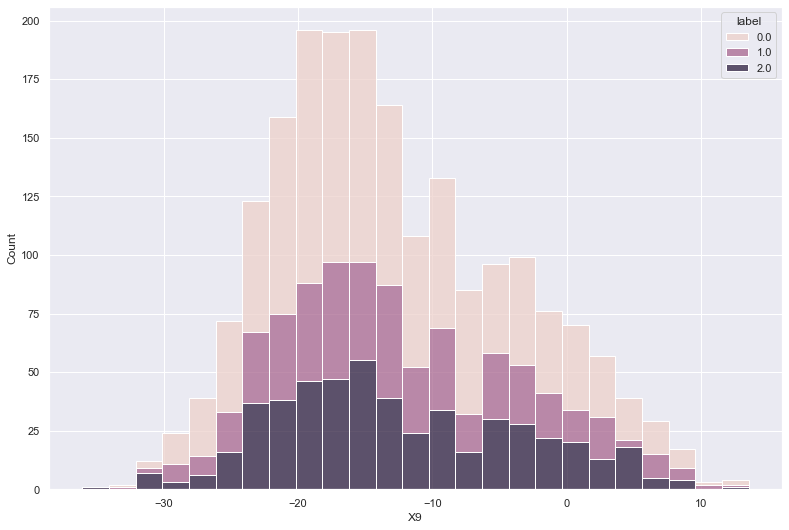

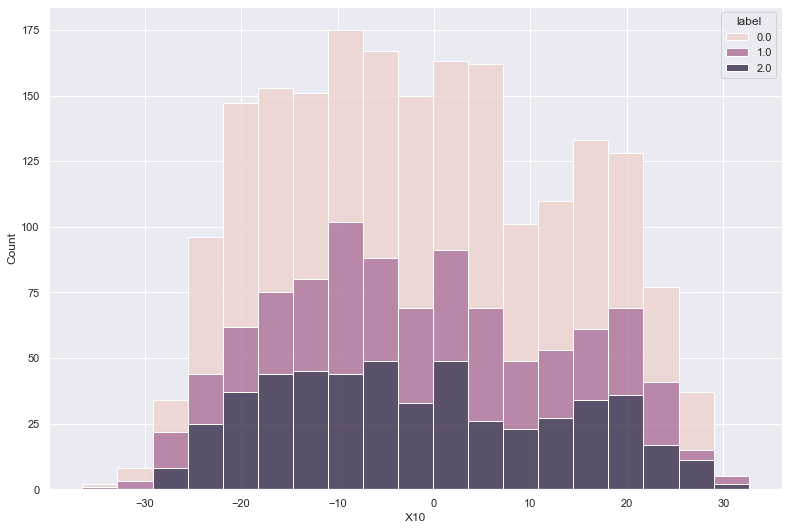

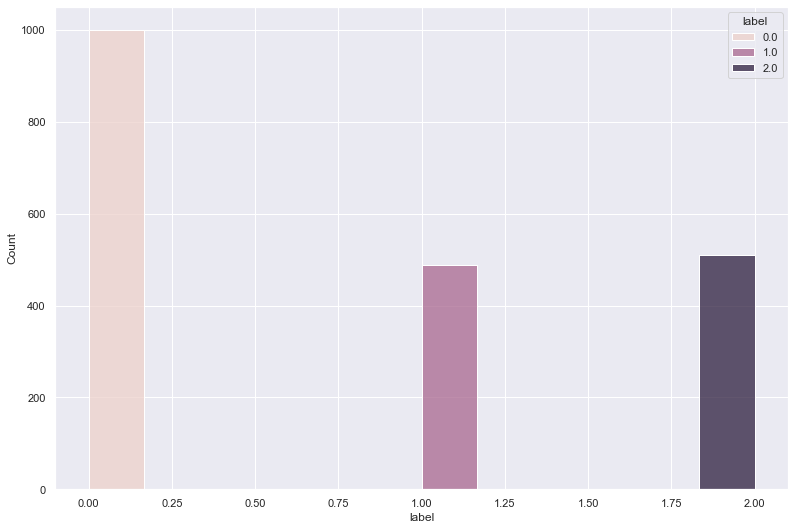

In [82]:
for i, col in enumerate(X_df.columns[:]):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.figure(i)
    sns.histplot(X_df,x=col,hue='label',multiple='stack')

As predicted, the clusters do not seem to differenciate in the plots. The distribution of clusters in each variable also seem to overlap alot

### Standardize the values

From the graphs and summary by mean. It seems like the Kmean does not do a very good job clustering the values. This maybe be attributed to the data is not scaled and clustering is very sensitive viotile range of data. Therefore, I decided to scale the data and perform the analysis again.

In [129]:
ss = StandardScaler()
df2 = ss.fit_transform(df1)
df2 = pd.DataFrame(df2)
df2.head()

0         1         2         3         4         5         6  \
0  1.261643  0.240946  0.640260 -0.097340  0.513943 -1.265229 -0.872556   
1  0.662147  1.742569  1.201568  0.223627 -0.681256  0.148326  0.367096   
2  0.284644  1.201389  0.059264  0.150409 -0.452003  0.628456  0.760311   
3  0.364840 -0.145448 -0.341659 -0.849507 -0.785295 -1.458680 -0.907978   
4 -0.030388 -0.746657 -0.391956  0.252233 -0.852402 -1.068490 -0.470794   

          7         8         9  
0 -1.500470 -1.813215  0.288407  
1 -0.166265  0.799426 -1.494155  
2  1.053396 -0.306571 -0.753805  
3 -0.831983 -0.275399  0.560094  
4 -1.980072 -0.498418  0.507455

In [130]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(df2)
     sse.append(kmeans.inertia_)

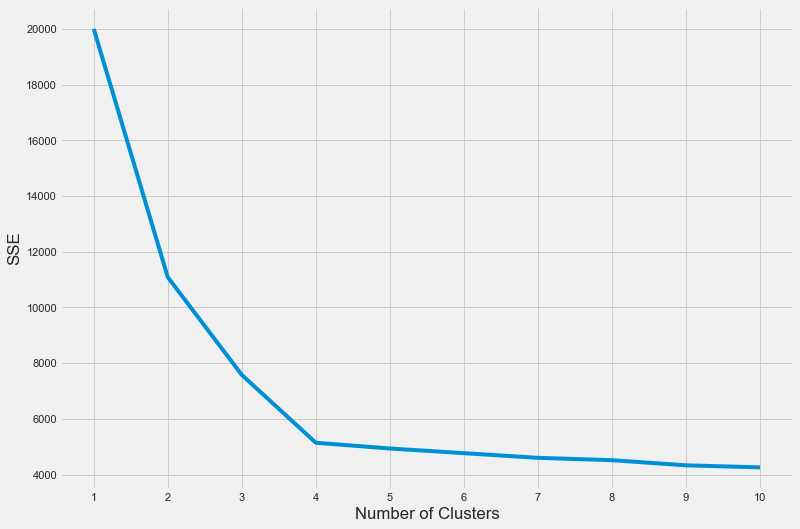

In [131]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [132]:
X = df2.iloc[:,:]
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels

array([0, 1, 1, ..., 0, 2, 0], dtype=int32)

In [133]:
pd.DataFrame(labels).value_counts(sort=False)

0    1001
1     489
2     510
dtype: int64

size of the clusters are the same as before scaling

In [134]:
X_df = pd.DataFrame(X)
X_df.columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
X_df['label'] = pd.DataFrame(labels)
X_df.head()

X1        X2        X3        X4        X5        X6        X7  \
0  1.261643  0.240946  0.640260 -0.097340  0.513943 -1.265229 -0.872556   
1  0.662147  1.742569  1.201568  0.223627 -0.681256  0.148326  0.367096   
2  0.284644  1.201389  0.059264  0.150409 -0.452003  0.628456  0.760311   
3  0.364840 -0.145448 -0.341659 -0.849507 -0.785295 -1.458680 -0.907978   
4 -0.030388 -0.746657 -0.391956  0.252233 -0.852402 -1.068490 -0.470794   

         X8        X9       X10  label  
0 -1.500470 -1.813215  0.288407      0  
1 -0.166265  0.799426 -1.494155      1  
2  1.053396 -0.306571 -0.753805      1  
3 -0.831983 -0.275399  0.560094      0  
4 -1.980072 -0.498418  0.507455      0

In [135]:
X_stat = X_df.groupby('label').agg('mean')
X_stat

X1        X2        X3        X4        X5        X6        X7  \
label                                                                         
0      0.442192 -0.579452  0.444397 -0.739493  0.079815 -0.915401 -0.852234   
1      0.697352  0.398056  0.581995  0.252830 -0.569618  0.780045  0.941420   
2     -1.536547  0.755651 -1.430269  1.209016  0.389506  1.048773  0.770063   

             X8        X9       X10  
label                                
0     -0.648083 -0.704814  0.823156  
1      0.172394  0.081612 -1.233487  
2      1.106727  1.305119 -0.432949

The mean of each variable between clusters seem to be more differentiated after scaling

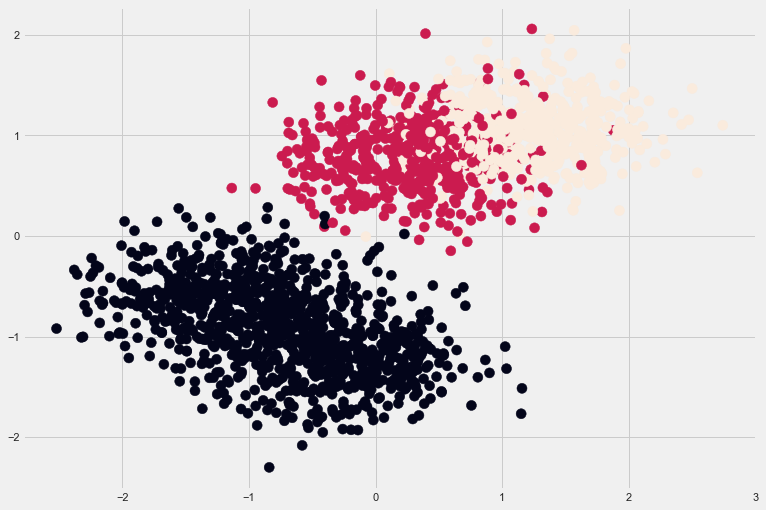

In [136]:
plt.scatter(X_df['X4'],X_df['X6'], s=100, c= X_df['label'],label = X_df['label'])

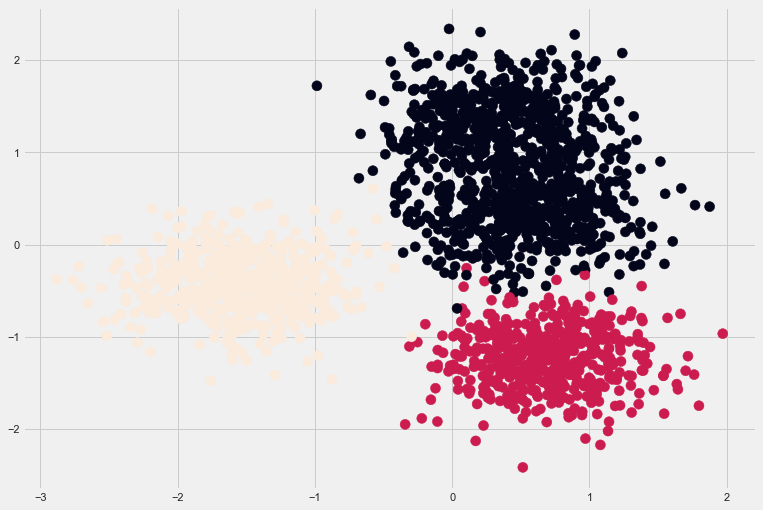

In [137]:
plt.scatter(X_df['X1'],X_df['X10'], s=100, c= X_df['label'],label = X_df['label'])

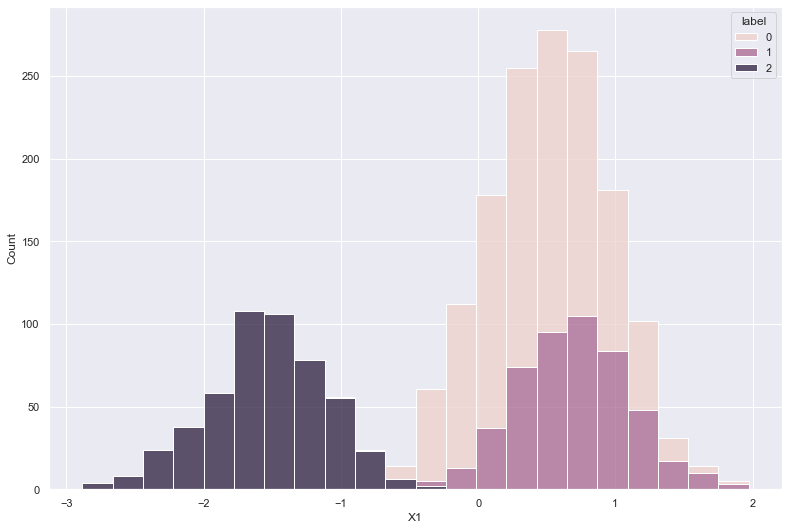

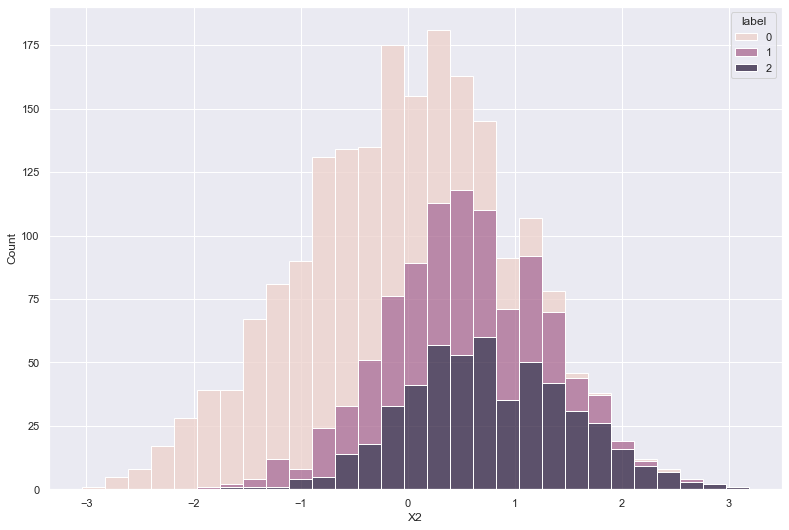

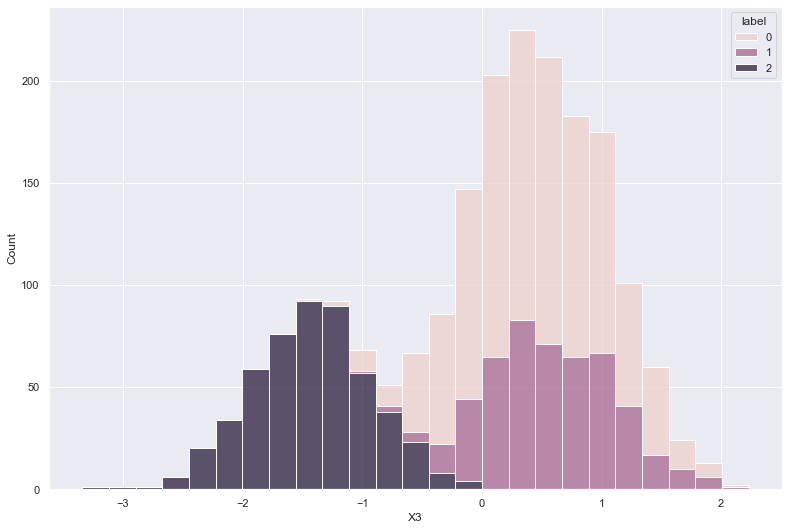

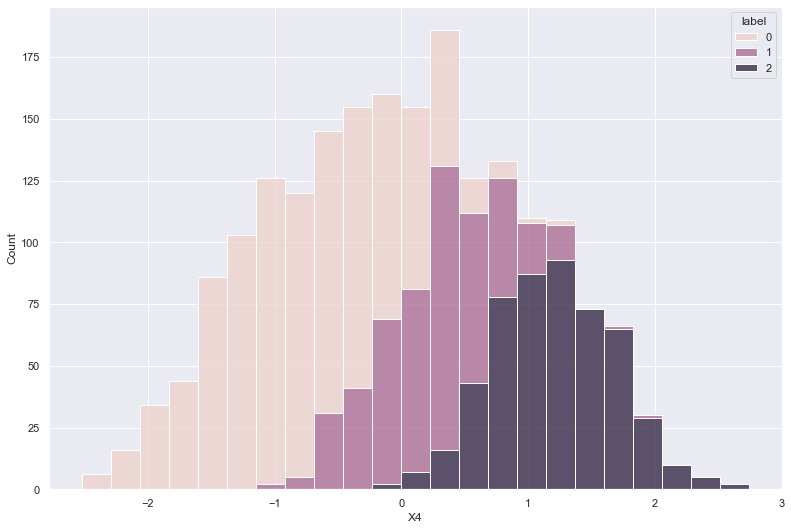

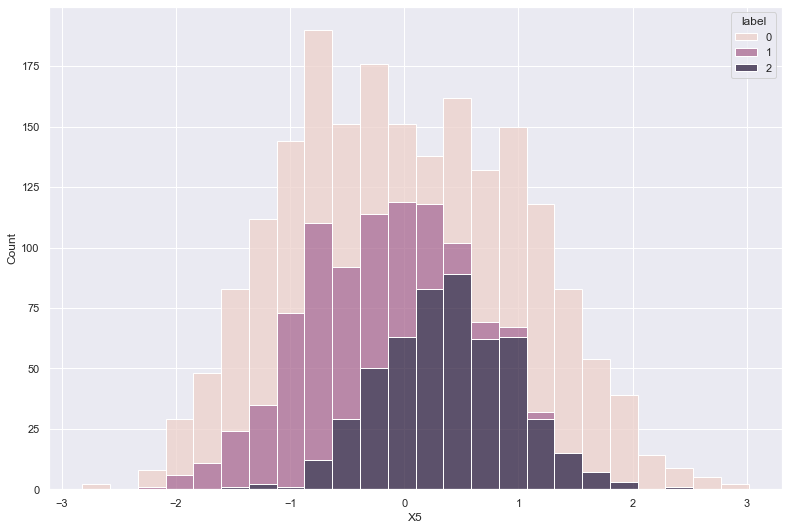

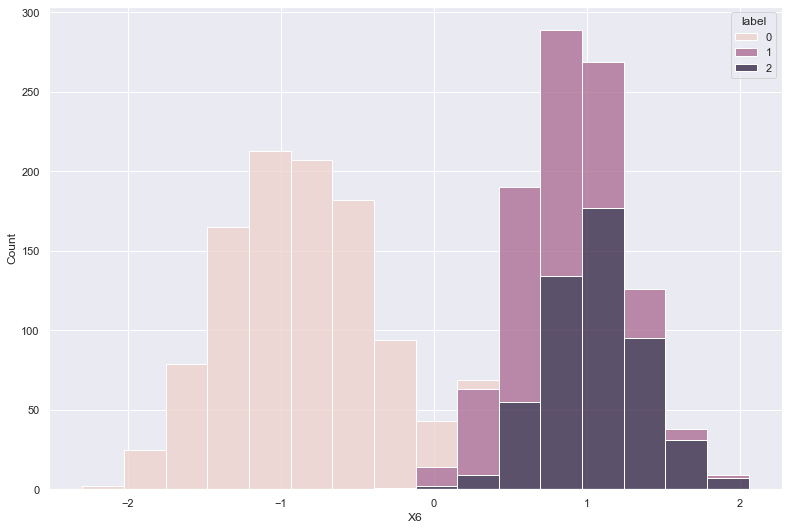

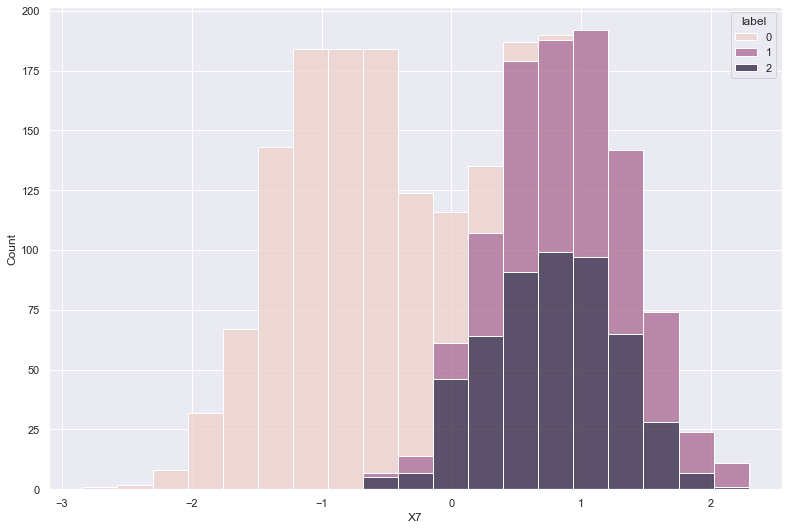

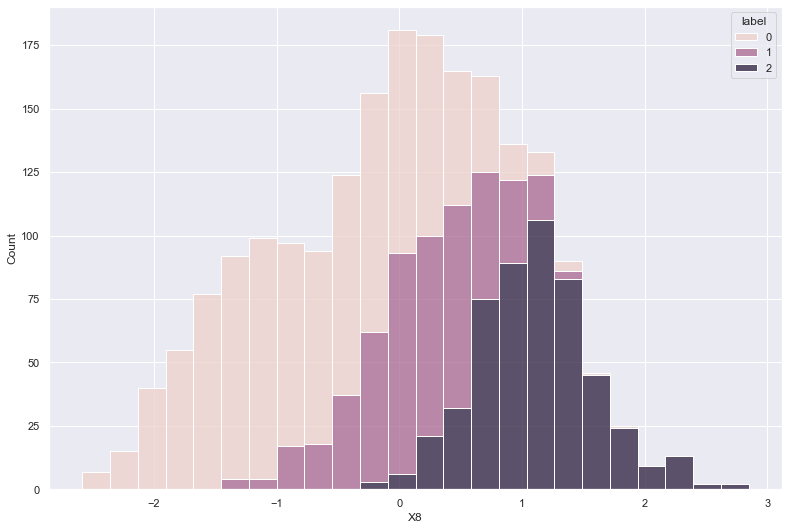

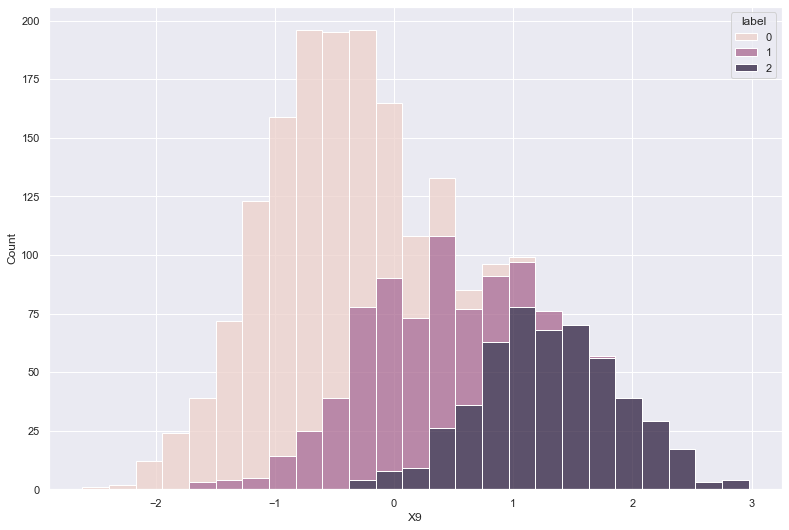

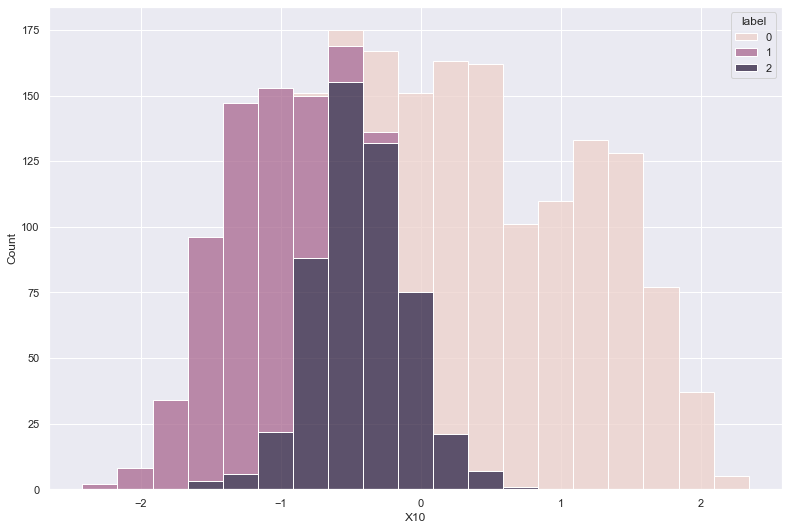

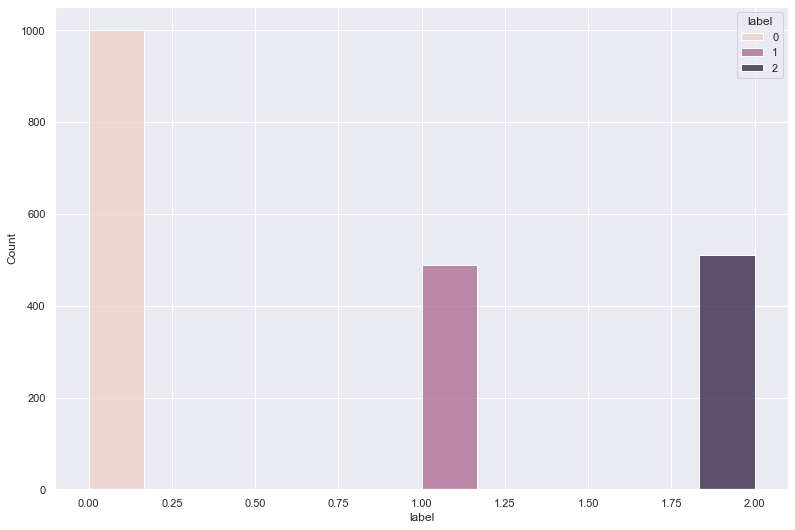

In [138]:
for i, col in enumerate(X_df.columns[:]):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.figure(i)
    sns.histplot(X_df,x=col,hue='label',multiple='stack')

The scaling certainly helps as now the three clusters are more grouped together. There are also larger differences between each cluster in terms of mean of each variable.

Finally, the histograms show in most variables, the distribution of each cluster is different from one another.

# Exercise three- SQL

#Qa.	How many posts were created in 2017?

:5,033,652

Query:

Select year(CreationDate) as yr, count(Id) as ct from Posts

where year(CreationDate) = 2017

group by year(CreationDate)

#Qb.	What post/question received the most answers?

   ID:184618, Answer count:518
   
Query:

select Id, AnswerCount 

from Posts

where AnswerCount = (select max(AnswerCount) from Posts)

#Qc.	For posts created in 2020, what were the top 10 tags?

Query:

Select top 10 Tags, count(Id) as popularity from Posts

where year(CreationDate) = 2020

group by Tags

order by count(id) desc


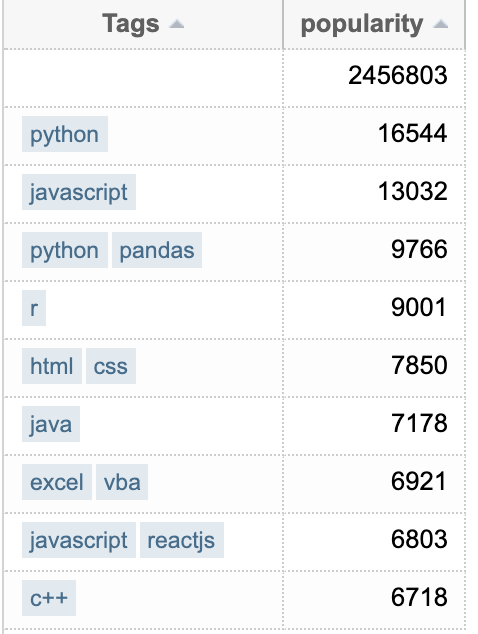




#Qc:extend

Since the number one tag is empty, we may want to extend to top 11.
If desired to see tags that are not null on;y we can also add that to the where condition

Query:

Select top 10 Tags, count(Id) as popularity from Posts

where year(CreationDate) = 2020 and Tags is not null

group by Tags

order by count(id) desc


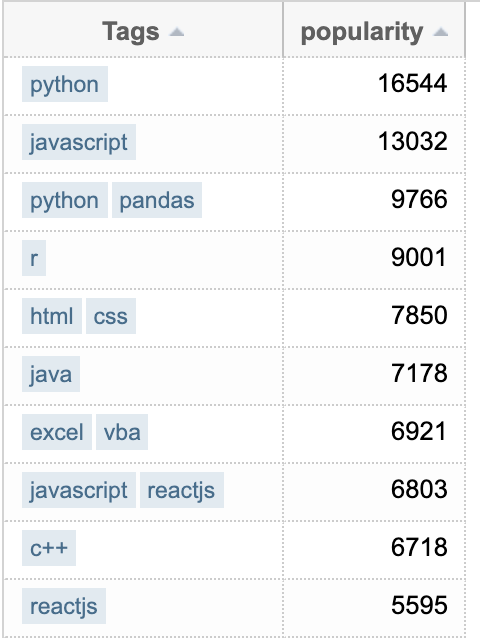

#Qd:BONUS* For the questions created in 2017, what was the average time (in seconds) between when the question was created and when the accepted answer was provided?!

select Avg(datediff(second,c.CreationDate,p.CreationDate)) 

from Comments as c

inner join Posts as p on p.Id = c.PostId 

and c.userId = p.AcceptedAnswerId

where year(p.CreationDate) = 2017